<a href="https://colab.research.google.com/github/zzp-seeker/BUPT-Reservation/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 加载数据集

In [1]:
# 加载数据
!gdown --id '1m26TV-Rp3H3RamSQ_2DzR_GRFDUMD-RW' --output Datasets.zip
!unzip Datasets.zip
!ls
import shutil,os
macosx_path='/content/__MACOSX'
if os.path.exists(macosx_path):
    shutil.rmtree(macosx_path)

Downloading...
From: https://drive.google.com/uc?id=1m26TV-Rp3H3RamSQ_2DzR_GRFDUMD-RW
To: /content/Datasets.zip
20.5MB [00:00, 125MB/s]
Archive:  Datasets.zip
   creating: Datasets/
  inflating: Datasets/amazon_book.review  
  inflating: __MACOSX/Datasets/._amazon_book.review  
   creating: Datasets/CroppedYale/
  inflating: __MACOSX/Datasets/._CroppedYale  
  inflating: Datasets/.DS_Store      
  inflating: __MACOSX/Datasets/._.DS_Store  
  inflating: Datasets/CroppedYale/.DS_Store  
  inflating: __MACOSX/Datasets/CroppedYale/._.DS_Store  
   creating: Datasets/CroppedYale/yaleB02/
  inflating: __MACOSX/Datasets/CroppedYale/._yaleB02  
   creating: Datasets/CroppedYale/yaleB05/
  inflating: __MACOSX/Datasets/CroppedYale/._yaleB05  
   creating: Datasets/CroppedYale/yaleB04/
  inflating: __MACOSX/Datasets/CroppedYale/._yaleB04  
   creating: Datasets/CroppedYale/yaleB03/
  inflating: __MACOSX/Datasets/CroppedYale/._yaleB03  
   creating: Datasets/CroppedYale/yaleB10/
  inflating: __MAC

In [2]:
# get sources of the pyclustering library, for example, from repository
!git clone https://github.com/zzp-seeker/pyclustering.git 
# 原始pyclustering github代码有些问题，我fork一下改了下代码  不改代码的话直接 pip install pyclustering即可

# compile CCORE library (core of the pyclustering library).
%cd pyclustering/ccore/
!make ccore_64bit      # build for 64-bit OS

# $ make ccore_32bit    # build for 32-bit OS

# return to parent folder of the pyclustering library
%cd ../

# install pyclustering library
!/usr/bin/python3 setup.py install
%cd ../

Cloning into 'pyclustering'...
remote: Enumerating objects: 25956, done.
remote: Counting objects: 100% (547/547), done.
remote: Compressing objects: 100% (368/368), done.
remote: Total 25956 (delta 332), reused 287 (delta 167), pack-reused 25409
Receiving objects: 100% (25956/25956), 34.23 MiB | 29.78 MiB/s, done.
Resolving deltas: 100% (19625/19625), done.
/content/pyclustering/ccore
make -j4 -f ccore.mk ccore PLATFORM="64-bit"
make[1]: Entering directory '/content/pyclustering/ccore'
mkdir -p obj/ccore/64-bit/.
mkdir -p obj/ccore/64-bit/cluster
mkdir -p obj/ccore/64-bit/container
mkdir -p obj/ccore/64-bit/differential
mkdir -p obj/ccore/64-bit/interface
mkdir -p obj/ccore/64-bit/nnet
mkdir -p obj/ccore/64-bit/parallel
mkdir -p obj/ccore/64-bit/utils
g++ -c -O2 -MMD -MP -pthread -std=c++14 -fPIC -m64 -Wall -Wpedantic -DEXPORT_PYCLUSTERING_INTERFACE -I./include/  src/cluster/gmeans.cpp -o obj/ccore/64-bit/cluster/gmeans.o
g++ -c -O2 -MMD -MP -pthread -std=c++14 -fPIC -m64 -Wall -Wpeda

# 数据处理


*   数据集一返回：data1, labels1
*   数据集二返回：data2, labels2



##  数据集一处理

In [3]:
# 数据集一预处理
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# 加载数据集1
import os
path = "/content/Datasets/CroppedYale" #文件夹目录
files= os.listdir(path) #得到文件夹下的所有文件名称
files.sort()
data,labels = None,None
for file in files: # 遍历文件夹
    if os.path.isdir(path+"/"+file) and file.find('yale')!=-1: #判断是否是数据集文件夹
        #print(file)
        imgs=os.listdir(path+"/"+file)
        for img_str in imgs:
            if img_str.find(".pgm")!=-1:
                img = Image.open(path+"/"+file+"/"+img_str)
                data=np.array(img).ravel() if data is None else np.vstack((data,np.array(img).ravel()))
                index=int(file[-1:])-1 if file[-2]=='0' else int(file[-2:])-1 #1-10转化为0-9
                labels=np.array(index) if labels is None else np.append(labels,index)
        #print(labels)
print(data.shape,labels.shape)
data1=data.copy()
labels1=labels.copy()

(650, 32256) (650,)


## 数据集二处理

In [4]:
# 数据集2处理
# 提取文字数据
import re
import numpy as np

with open("/content/Datasets/amazon_book.review") as bookdata:
  #book1 = list(bookdata)
  bookfile = [line.rstrip('\n') for line in bookdata]

filtered_word = []
filtered_count = []
label=[]
for token in bookfile:
  #取冒号右边的count
  temp_count = re.findall(r"(?<=:)+[^:\s]",token[:-3])  
  filtered_count.append(temp_count)
  #取冒号左边的文本内容
  temp_word = re.findall(r"[^:\s]+(?=:)",token[:-6])
  filtered_word.append(temp_word)
  label.append(int(float(token.split(" ")[-1].split(":")[-1])))

print(filtered_word[0])  
print(filtered_count[0])
print(label[0])
print(len(label))

['helpful', 'voices_of', 'the_levels', 'it', 'only_knew', '"if_i', 'guidance_in', 'departing_one', 'familiarize', 'meaning', 'self_is', 'can_be', 'knowledge', "koan's_since", 'be', 'experiences_actions', 'spiritually_the', 'you_to', 'collection', 'with_not', 'as', 'disciplines_spiritually', 'levels', 'that_i', 'work_but', 'to_anything', 'each_statement', 'much_much', 'dhu-l-nun', 'a_quote', 'badruddin', 'all_through', 'sets', 'but', 'chapters_offer', 'actions_remembrances', 'one_from', 'revisited_for', 'sufisim', 'some', 'fallow', 'upon', 'which', 'bistami_and', 'more_a', 'not_only', 'bayazid', 'path_of', 'awakening', 'the_many', 'intellective_sufis', 'experiences', 'and_all', 'great', 'and_much', 'yourself', 'through_the', "guidance's._the", 'in_a', 'upon_awakening', 'meaning_for', 'introducing_hadiths', 'fantasic', "guidance's.", 'had_taken', 'point_it', 'contemplation_in', 'value', 'quote_from', 'sincerity', 'remembrances_and', 'of_guidance', 'compared', 'find_no', 'eternal_intellec

In [5]:
#为词表做预处理
#分词
split_word = []
for i in filtered_word:
  for j in i:
    temp_split = j.split('_')
    for k in temp_split:
      split_word.append(k) 
    
print(split_word[:10])


#转换成小写
def lower_case(x):
  x = [s.lower() for s in x]
  return x
lower_word = lower_case(split_word)


#删除标点符号
def remove_punctuation_re(x):
  import re
  x = re.sub(r'[^\w\s]','',x)   
  return x
pure_word = [remove_punctuation_re(s) for s in lower_word]
print(pure_word[:10])

['helpful', 'voices', 'of', 'the', 'levels', 'it', 'only', 'knew', '"if', 'i']
['helpful', 'voices', 'of', 'the', 'levels', 'it', 'only', 'knew', 'if', 'i']


In [6]:
#删除停用词
import nltk
def stopwords_removal(x):
  nltk.download('stopwords')

  from nltk.corpus import stopwords as sw

  stop_words = sw.words()

  y = []
  for i in x:
    if not i in stop_words:
      y.append(i)

  return y

stopwords_word = stopwords_removal(pure_word)
print(stopwords_word[:10])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['helpful', 'voices', 'levels', 'knew', 'guidance', 'departing', 'familiarize', 'meaning', 'self', 'knowledge']


In [7]:
print(len(stopwords_word))
#整理词集合
word_set = set() 
for i in stopwords_word:
  word_set.add(i)

word_list = list(word_set) #列表化

print(word_list[:5])
print('words_len:')
print(len(word_list)) #共46641个词


#建词表
word_index = {}
ind = 0
for word in word_list:
    word_index[word] = ind
    ind += 1

#print(word_index['alexs'])
#print(word_index['hopeful'])

1175666
['', 'reccomended', 'tracy', 'gop', 'sassy']
words_len:
46641


In [8]:
#做完词表，做特征向量
#重新处理文本信息，保持列表形状
#拆分数据集文本N
split_worddata = filtered_word
for i in range(len(filtered_word)):
  for j in range(len(filtered_word[i])):
    temp_split1 = filtered_word[i][j].split('_')
    split_worddata[i][j] = temp_split1
    
print(split_worddata[0])

[['helpful'], ['voices', 'of'], ['the', 'levels'], ['it'], ['only', 'knew'], ['"if', 'i'], ['guidance', 'in'], ['departing', 'one'], ['familiarize'], ['meaning'], ['self', 'is'], ['can', 'be'], ['knowledge'], ["koan's", 'since'], ['be'], ['experiences', 'actions'], ['spiritually', 'the'], ['you', 'to'], ['collection'], ['with', 'not'], ['as'], ['disciplines', 'spiritually'], ['levels'], ['that', 'i'], ['work', 'but'], ['to', 'anything'], ['each', 'statement'], ['much', 'much'], ['dhu-l-nun'], ['a', 'quote'], ['badruddin'], ['all', 'through'], ['sets'], ['but'], ['chapters', 'offer'], ['actions', 'remembrances'], ['one', 'from'], ['revisited', 'for'], ['sufisim'], ['some'], ['fallow'], ['upon'], ['which'], ['bistami', 'and'], ['more', 'a'], ['not', 'only'], ['bayazid'], ['path', 'of'], ['awakening'], ['the', 'many'], ['intellective', 'sufis'], ['experiences'], ['and', 'all'], ['great'], ['and', 'much'], ['yourself'], ['through', 'the'], ["guidance's.", 'the'], ['in', 'a'], ['upon', 'awa

In [9]:
#转换成小写
def lower_case(x):
  for i in range(len(x)):
    for j in range(len(x[i])):
      temp = [s.lower() for s in x[i][j]]
      x[i][j] = temp
  return x

lower_worddata = lower_case(split_worddata)


#删除标点符号
def remove_punctuation_re(x):
  import re
  for i in range(len(x)):
    for j in range(len(x[i])):
      x[i][j] = re.sub(r'[^\w\s]','',x[i][j])   
  return x

new_worddata = [remove_punctuation_re(s) for s in lower_worddata]
print(new_worddata[0])

[['helpful'], ['voices', 'of'], ['the', 'levels'], ['it'], ['only', 'knew'], ['if', 'i'], ['guidance', 'in'], ['departing', 'one'], ['familiarize'], ['meaning'], ['self', 'is'], ['can', 'be'], ['knowledge'], ['koans', 'since'], ['be'], ['experiences', 'actions'], ['spiritually', 'the'], ['you', 'to'], ['collection'], ['with', 'not'], ['as'], ['disciplines', 'spiritually'], ['levels'], ['that', 'i'], ['work', 'but'], ['to', 'anything'], ['each', 'statement'], ['much', 'much'], ['dhulnun'], ['a', 'quote'], ['badruddin'], ['all', 'through'], ['sets'], ['but'], ['chapters', 'offer'], ['actions', 'remembrances'], ['one', 'from'], ['revisited', 'for'], ['sufisim'], ['some'], ['fallow'], ['upon'], ['which'], ['bistami', 'and'], ['more', 'a'], ['not', 'only'], ['bayazid'], ['path', 'of'], ['awakening'], ['the', 'many'], ['intellective', 'sufis'], ['experiences'], ['and', 'all'], ['great'], ['and', 'much'], ['yourself'], ['through', 'the'], ['guidances', 'the'], ['in', 'a'], ['upon', 'awakening

In [10]:
#%%
import numpy as np 
review_len = len(filtered_word) #句子总数
index_len = len(word_list) #词表长度
word_np = np.zeros([review_len,index_len], dtype = int)  #定义数组维度为（len（总共），len（词表list完的集合）），填充0
for sentence_index in range(len(new_worddata)): #第n句话
  word_xl = np.zeros(index_len, dtype = int) #创建一维的数组，对应每句话的特征向量
  for word_ind in range(len(new_worddata[sentence_index])): #第n个括号内
    for splitword_index in range(len(new_worddata[sentence_index][word_ind])): #遍历括号内的词
      if new_worddata[sentence_index][word_ind][splitword_index] in word_index: #判断这个词是否在字典内
        temp_index = word_index[new_worddata[sentence_index][word_ind][splitword_index]] #如果在词表中，就取出这个词所在的词表中的位置，value做索引
        word_xl[temp_index] = word_xl[temp_index] + int(filtered_count[sentence_index][word_ind]) #然后word向量对应索引的位置加上这个词所在列表的count值，word向量考虑初始化全为0（如果是numpy数组的话）

        ''' 验证2的数量，没问题
        if filtered_count[sentence_index][word_ind]=='2' and sentence_index==0:
            print("t:",word_ind)
            print(new_worddata[sentence_index][word_ind])
      else:
        if filtered_count[sentence_index][word_ind]=='2' and sentence_index==0:
            print("f:",word_ind)
            print(new_worddata[sentence_index][word_ind])
        '''
  
  word_np[sentence_index] = word_xl

print(word_np[0])
print(len(filtered_word))
print(word_np.shape) #特征向量的维度


[0 0 0 ... 0 0 0]
5501
(5501, 46641)


In [12]:
from sklearn.decomposition import PCA
# data2维度过大，使用PCA进行降维，然而降维之后效果不太好  需要进一步 tradeoff
pca=PCA(n_components=1000) # PCA降成1000维
data2 = pca.fit_transform(word_np) # PCA降维拟合数据
labels2=[i-1 if i<4 else i-2 for i in label] # 原来label只有1，2，3，5 现在变为 0，1，2，3

# 聚类评测
共有三个指标 轮廓系数、CHI、DBI

## 指标评测

In [18]:
from sklearn import metrics
def evaluate_cluster(name, data, labels, pred_labels):

    print(90 * '_')
    print('init\t\t\t\tsilhouette\tCHI\tDBI')
    results = [name]

    sil=-1.
    # 轮廓系数：同类别越近，不同类别越远，分数越高 [-1,1]
    try:
        sil = metrics.silhouette_score(data, pred_labels, metric="euclidean")
    except:
        pass

    results += [
        sil,
        # Calinski-Harabasz Index CHI
        metrics.calinski_harabasz_score(data, pred_labels),
        # Davies-Bouldin Index(戴维森堡丁指数) DBI
        metrics.davies_bouldin_score(data, pred_labels)

    ]

    formatter_result = ("{:9s}\t{:.3f}\t\t{:.3f}\t{:.3f}")
    print(formatter_result.format(*results))
    print(90 * '_')

## Table 实验结果展示

In [19]:
# 表格
import pandas as pd

# name：名称  labels：真实label值列表  pred_labels：预测labels值列表
def save_csv(name,labels,pred_labels):
    d={} # d字典描述：key：真实label数值  value：该label类中所有图像预测的label值列表
    # 比如有5个真实label值为0,0,1,2,0，预测的label值分别为1，1，0，2，3 那么d[0]=[1,1,3] d[1]=[0] d[2]=[2]
    for i in range(len(labels)):
        d[labels[i]]=[pred_labels[i]] if labels[i] not in d.keys() else d[labels[i]]+[pred_labels[i]]

    keys=sorted(list(d.keys())) # 得到d keys列表的复制
    nums,acc,pre=[],[],[] # 分别代表总数量，预测的最多的那个值数量占比，预测情况

    for key in keys:
        # d[str(key)]字典描述：key：预测的label值 value：该值出现的次数
        # 当key为"num"表示总数量，为ratio表示预测的最多的那个值数量占比 sort表示排序结果
        d[str(key)]={} 
        for t in d[key]:
            d[str(key)][t] = d[str(key)].get(t, 0) + 1 # d[str(key)][t]代表t在d[key]中的数量
        s = sorted(d[str(key)].items(), key=lambda x: x[1], reverse=True) # 根据数量排序
        d[str(key)]['sort']=s
        d[str(key)]['ratio']=s[0][1]/len(d[key]) # 排序第一的结果除以总长度设为ratio
        d[str(key)]['num']=len(d[key]) # 总数量

        nums+=[d[str(key)]['num']]
        acc+=[d[str(key)]['ratio']]
        pre+=[d[str(key)]['sort']]


    # 保存为表格 csv文件
    sub = pd.DataFrame(columns=['Labels', 'Count','Ratio','Predictions'])
    sub['Labels'],sub['Count'],sub['Ratio'],sub['Predictions'] = keys,nums,acc,pre
    sub.to_csv(f'result-{name}.csv', index=None)

    print(sub)

## Graph 实验结果展示

In [20]:
# 图可视化
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from pyclustering.cluster.kmeans import kmeans, kmeans_visualizer
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.utils.metric import type_metric, distance_metric
from sklearn.cluster import AgglomerativeClustering

# 仅针对kmeans方法
def graph_vis(data,labels,n_clusters,metric):
    pca=PCA(n_components=2) # PCA降维
    reduced_data = pca.fit_transform(data) # PCA降维拟合数据
    print(reduced_data.shape)

    initial_centers = kmeans_plusplus_initializer(reduced_data, n_clusters).initialize()
    ins = kmeans(reduced_data, initial_centers,metric=metric)
    ins.process()
    title="kmeans & "+ str(metric.get_type())


    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = 100     # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # print("xx.shape,yy.shape",xx.shape,yy.shape)
    # Obtain labels for each point in mesh. Use last trained model.
    # print(np.c_[xx.ravel(), yy.ravel()])

    Z = ins.predict(np.c_[xx.ravel(), yy.ravel()])
    # print(Z)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    # print("Z.shape",Z.shape)

    plt.rcParams['figure.dpi'] = 100 #分辨率
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation="nearest",
              extent=(xx.min(), xx.max(), yy.min(), yy.max()),
              cmap=plt.cm.Paired, aspect="auto", 
              origin="lower")
    # 分别为：红橙黄绿蓝靛紫赭灰粉   见：https://www.sioe.cn/yingyong/yanse-rgb-16/
    color_dict={0:'#FF0000',1:'#FF8C00',2:'#FFFF00',3:'#2E8B57',4:'#0000FF',5:'#4B0082',6:'#800080',7:'#A0522D',8:'#808080',9:'#FF1493'}
    for i in range(reduced_data.shape[0]):
        plt.plot(reduced_data[i, 0], reduced_data[i, 1], 'k.', markersize=2,alpha=0.9,color=color_dict[labels[i]])

    # Plot the centroids as a white X
    centroids = np.array(ins.get_centers())
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=169, linewidths=3,
                  color="w")

    for i in range(centroids.shape[0]):
        plt.text(centroids[i, 0], centroids[i, 1]-0.3, '%d' % i, ha='center',
            va='center',fontsize=10,c='red',weight='bold')
    plt.title(title + " on PCA-reduced data\n")
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(()) # 去掉坐标轴
    plt.yticks(())
    plt.show()


# 确认聚类中心数量
两个数据集聚类中心数量分别为：n_clusters1, n_clusters2

In [21]:
from sklearn import metrics
from sklearn.cluster import KMeans

# 手肘法确认n_clusters，data：数据  n_clusters从[start_n,end_n]进行遍历
def elbow_method(data,start_n,end_n):
    # Elbow Method
    distortions = []
    for i in range(start_n, end_n+1):
        km = KMeans(
            n_clusters=i, init='random',
            n_init=4, max_iter=300,
            tol=1e-04, random_state=0
        )
        km.fit(data1)
        distortions.append(km.inertia_) # 样本到其最近的聚类中心的距离的平方之和

    # plot
    plt.plot(range(start_n, end_n+1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

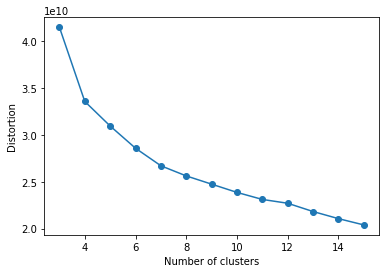

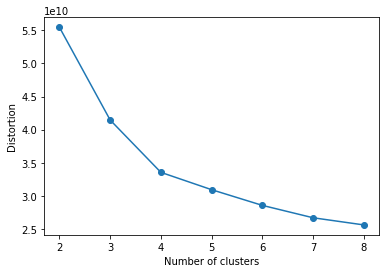

In [22]:
elbow_method(data1,3,15)
elbow_method(data2,2,8)

In [23]:
# 由手肘法确认聚类中心数量分别为10，4
# 数据集二label只有1，2，4，5（没有3）四种，故为4
n_clusters1=10
n_clusters2=4

# 聚类方法

In [24]:
from pyclustering.cluster.kmeans import kmeans
from pyclustering.cluster.agglomerative import agglomerative,type_link
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.utils.metric import type_metric, distance_metric
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.cluster import SpectralBiclustering

# 定义Kmeans方法函数
# data:数据 n_clusters:聚类数量 metric:距离度量 返回kmeans_instance和预测label列表
def Kmeans(data,n_clusters,metric):
    # Prepare initial centers using K-Means++ method.
    initial_centers = kmeans_plusplus_initializer(data, n_clusters).initialize()
    # Create instance of K-Means algorithm with prepared centers.
    kmeans_instance = kmeans(data, initial_centers,metric=metric)
    # Run cluster analysis and obtain results.

    kmeans_instance.process()
    clusters = kmeans_instance.get_clusters()
    final_centers = kmeans_instance.get_centers()

    label_pred=[]
    for i in range(len(data)):
        for j in range(len(clusters)):
            if i in clusters[j]:
                label_pred.append(j)
                break

    return kmeans_instance,label_pred


def Agglomerative(data,n_clusters,affinity,linkage):
    ac=AgglomerativeClustering(n_clusters=n_clusters,affinity=affinity,linkage=linkage)
    pred_labels = ac.fit_predict(data)

    return pred_labels

def DBS(data,n_clusters):
    db = DBSCAN(eps=0.5).fit(data)
    labels = db.labels_
    return labels

def MEANShift(data):
    clustering = MeanShift().fit(data)
    return clustering.labels_


def Spectral(data,n_clusters):
    clustering = SpectralBiclustering(n_clusters=n_clusters, random_state=0).fit(data)
    return clustering.row_labels_



# 对数据集一进行kmeans++聚类

## 采用Euclidean距离
Kmeans实例为：kmeans_eu<br>
预测结果为：label_kmeans_eu_pred

In [25]:
# 对数据集一进行kmeans++&EUCLIDEAN距离聚类

metric1 = distance_metric(type_metric.EUCLIDEAN)
kmeans_eu,label_kmeans_eu_pred = Kmeans(data1,n_clusters1,metric1)

print(label_kmeans_eu_pred)
print(len(label_kmeans_eu_pred))

[2, 0, 1, 2, 4, 0, 2, 4, 0, 2, 1, 8, 4, 9, 8, 0, 0, 5, 4, 0, 3, 4, 6, 3, 5, 5, 4, 5, 9, 9, 4, 1, 1, 7, 6, 1, 7, 0, 0, 8, 6, 5, 7, 5, 5, 6, 0, 9, 2, 8, 5, 7, 2, 8, 6, 7, 8, 2, 1, 4, 8, 9, 9, 2, 7, 5, 4, 5, 6, 3, 3, 3, 3, 3, 0, 0, 7, 2, 8, 3, 3, 3, 0, 0, 3, 4, 2, 3, 5, 7, 4, 2, 2, 4, 0, 2, 3, 3, 1, 4, 3, 8, 3, 5, 1, 2, 0, 6, 3, 0, 5, 0, 0, 5, 0, 5, 7, 1, 3, 0, 0, 2, 3, 5, 0, 3, 3, 7, 1, 7, 0, 2, 9, 2, 9, 2, 4, 9, 5, 2, 9, 8, 2, 0, 2, 8, 4, 5, 1, 2, 9, 9, 9, 1, 4, 6, 4, 1, 5, 7, 7, 0, 1, 4, 4, 1, 5, 6, 1, 0, 5, 8, 9, 8, 2, 0, 4, 0, 2, 8, 0, 0, 5, 0, 4, 0, 7, 8, 8, 9, 9, 8, 0, 7, 0, 0, 2, 0, 7, 5, 7, 4, 7, 5, 7, 6, 5, 2, 2, 5, 5, 5, 2, 7, 4, 6, 6, 5, 0, 2, 2, 2, 1, 2, 6, 6, 6, 6, 6, 7, 6, 5, 0, 7, 2, 6, 5, 6, 5, 6, 2, 2, 7, 2, 2, 7, 6, 5, 7, 0, 4, 0, 7, 6, 5, 7, 0, 7, 6, 5, 3, 4, 0, 5, 7, 5, 5, 5, 2, 7, 8, 0, 0, 5, 0, 2, 3, 4, 0, 3, 0, 3, 4, 0, 7, 5, 5, 3, 6, 3, 2, 4, 2, 0, 3, 3, 2, 3, 7, 2, 3, 3, 2, 6, 0, 2, 0, 3, 0, 3, 3, 3, 3, 0, 3, 3, 5, 3, 2, 3, 0, 0, 3, 0, 7, 1, 2, 6, 9, 9, 8, 1, 5, 

In [26]:
# 指标评测
evaluate_cluster(name="k-means && EUCLIDEAN_distance", data=data1, labels=labels1, pred_labels=label_kmeans_eu_pred)

__________________________________________________________________________________________
init				silhouette	CHI	DBI
k-means && EUCLIDEAN_distance	0.181		158.881	1.606
__________________________________________________________________________________________


In [27]:
# 表评测
save_csv(name="k-means && EUCLIDEAN_distance",labels=labels1,pred_labels=label_kmeans_eu_pred)

   Labels  Count     Ratio                                        Predictions
0       0     65  0.138462  [(0, 9), (2, 8), (4, 8), (5, 8), (8, 7), (1, 6...
1       1     65  0.292308  [(3, 19), (0, 13), (5, 8), (2, 7), (4, 5), (7,...
2       2     65  0.184615  [(0, 12), (9, 10), (2, 9), (4, 8), (8, 8), (5,...
3       3     65  0.230769  [(6, 15), (2, 13), (7, 13), (5, 13), (0, 7), (...
4       4     65  0.323077  [(3, 21), (0, 15), (2, 9), (5, 8), (7, 5), (4,...
5       5     65  0.153846  [(2, 10), (4, 9), (5, 8), (1, 7), (9, 6), (8, ...
6       6     65  0.230769  [(6, 15), (7, 12), (5, 12), (2, 11), (0, 8), (...
7       7     65  0.230769  [(6, 15), (0, 12), (5, 10), (2, 10), (7, 9), (...
8       8     65  0.292308  [(6, 19), (2, 9), (0, 8), (5, 8), (7, 8), (4, ...
9       9     65  0.184615  [(4, 12), (9, 10), (8, 10), (1, 9), (2, 8), (0...


(650, 2)


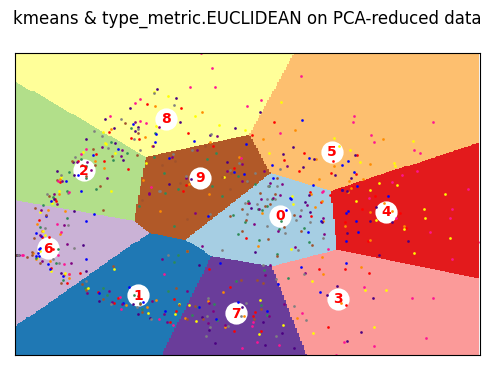

In [28]:
# 图可视化
graph_vis(data1,labels1,n_clusters1,metric1)

## 采用Cosine距离
Kmeans实例为：kmeans_cos<br>
预测结果为：label_kmeans_cos_pred

In [29]:
# 对数据集一进行kmeans++&cos距离聚类
from pyclustering.utils.metric import distance_metric, type_metric
def cosine(vector1, vector2):
    return 1-np.dot(vector1,vector2)/(np.linalg.norm(vector1)*(np.linalg.norm(vector2))) # 1-u.v/|u||v|
metric2 = distance_metric(type_metric.USER_DEFINED, func=cosine)

kmeans_cos,label_kmeans_cos_pred = Kmeans(data1,n_clusters1,metric2)

print(label_kmeans_cos_pred)

[2, 3, 2, 2, 3, 1, 1, 0, 3, 2, 4, 5, 0, 0, 5, 4, 4, 3, 3, 3, 5, 3, 0, 5, 3, 0, 0, 3, 5, 5, 0, 2, 4, 5, 5, 4, 5, 1, 1, 5, 5, 3, 5, 3, 3, 4, 3, 5, 1, 5, 3, 2, 1, 5, 0, 2, 5, 2, 4, 3, 5, 0, 0, 1, 5, 3, 0, 3, 0, 5, 5, 0, 0, 5, 3, 0, 4, 1, 5, 5, 5, 5, 3, 3, 0, 3, 2, 0, 3, 5, 0, 1, 2, 0, 3, 2, 5, 5, 2, 0, 5, 5, 5, 3, 4, 1, 4, 0, 5, 4, 3, 1, 3, 3, 3, 3, 2, 4, 5, 1, 1, 2, 5, 3, 3, 5, 5, 2, 2, 5, 4, 4, 5, 1, 0, 4, 0, 0, 3, 1, 5, 5, 2, 1, 2, 5, 3, 3, 4, 1, 5, 0, 0, 2, 0, 0, 3, 2, 3, 5, 2, 3, 2, 3, 3, 2, 3, 5, 4, 1, 3, 5, 5, 5, 1, 1, 0, 4, 2, 5, 3, 3, 3, 3, 0, 3, 5, 5, 5, 0, 5, 5, 3, 5, 3, 3, 4, 4, 5, 3, 5, 0, 5, 3, 2, 4, 3, 2, 2, 3, 0, 3, 1, 5, 3, 0, 5, 3, 1, 1, 2, 2, 2, 2, 0, 0, 5, 5, 0, 4, 0, 3, 3, 2, 1, 0, 3, 5, 3, 5, 1, 4, 5, 1, 2, 5, 0, 0, 5, 3, 3, 4, 5, 5, 3, 5, 3, 2, 0, 3, 5, 0, 5, 3, 2, 3, 3, 3, 2, 5, 2, 1, 4, 3, 3, 1, 5, 0, 3, 5, 5, 5, 0, 1, 5, 3, 3, 0, 5, 5, 2, 3, 2, 3, 5, 5, 2, 0, 2, 4, 5, 5, 1, 0, 0, 1, 3, 5, 4, 5, 5, 5, 5, 3, 5, 0, 3, 0, 2, 0, 1, 3, 5, 0, 2, 2, 2, 0, 0, 0, 5, 4, 3, 

In [30]:
# 指标评测
evaluate_cluster(name="k-means && COSINE_distance", data=data1, labels=labels1, pred_labels=label_kmeans_cos_pred)

__________________________________________________________________________________________
init				silhouette	CHI	DBI
k-means && COSINE_distance	0.125		135.939	2.039
__________________________________________________________________________________________


In [31]:
# 表评测
save_csv(name="k-means && COSINE_distance",labels=labels1,pred_labels=label_kmeans_cos_pred)

   Labels  Count     Ratio                                        Predictions
0       0     65  0.276923  [(5, 18), (3, 15), (0, 10), (2, 8), (1, 7), (4...
1       1     65  0.292308  [(5, 19), (3, 16), (0, 11), (2, 8), (1, 6), (4...
2       2     65  0.261538  [(5, 17), (3, 17), (0, 10), (2, 8), (1, 7), (4...
3       3     65  0.261538  [(3, 17), (5, 15), (0, 11), (2, 10), (4, 6), (...
4       4     65  0.323077  [(5, 21), (3, 15), (0, 11), (2, 9), (1, 6), (4...
5       5     65  0.261538  [(3, 17), (5, 15), (0, 11), (1, 8), (2, 7), (4...
6       6     65  0.276923  [(5, 18), (3, 17), (2, 9), (1, 8), (0, 8), (4,...
7       7     65  0.276923  [(3, 18), (5, 15), (0, 12), (1, 7), (2, 7), (4...
8       8     65  0.261538  [(3, 17), (5, 17), (4, 11), (0, 9), (1, 6), (2...
9       9     65  0.292308  [(3, 19), (5, 16), (0, 10), (2, 7), (1, 7), (4...


(650, 2)


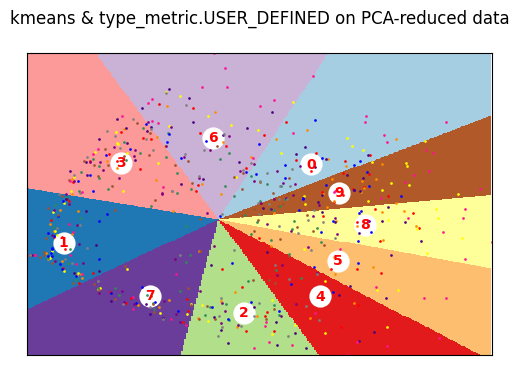

In [32]:
# 图可视化
graph_vis(data1,labels1,n_clusters1,metric2)

# 对数据集一进行Agglomerative聚类

## 采用canberra距离
分别采用complete、single、avg三种type-link

In [33]:
'''
pdist：计算样本距离,其中参数metric代表样本距离计算方法
(euclidean:欧式距离
minkowski:明氏距离
chebyshev:切比雪夫距离
canberra:堪培拉距离)
linkage：聚类,其中参数method代表簇间相似度计算方法
(single:  MIN
ward：沃德方差最小化
average：UPGMA
complete：MAX)
'''

label_agg_can_com_pred = Agglomerative(data1,n_clusters1,"canberra","complete")
# 指标评测
evaluate_cluster(name="canberra && complete link", data=data1, labels=labels1, pred_labels=label_agg_can_com_pred)
# 表评测
save_csv(name="agglomerative && canberra && complete link",labels=labels1,pred_labels=label_agg_can_com_pred)

__________________________________________________________________________________________
init				silhouette	CHI	DBI
canberra && complete link	0.090		116.752	2.160
__________________________________________________________________________________________
   Labels  Count     Ratio                                        Predictions
0       0     65  0.369231  [(4, 24), (7, 11), (8, 7), (9, 7), (6, 6), (5,...
1       1     65  0.384615  [(4, 25), (7, 12), (8, 7), (6, 7), (9, 7), (5,...
2       2     65  0.353846  [(4, 23), (7, 10), (5, 7), (6, 7), (9, 6), (8,...
3       3     65  0.323077  [(4, 21), (7, 11), (5, 8), (6, 6), (2, 6), (9,...
4       4     65  0.400000  [(4, 26), (9, 8), (6, 6), (5, 6), (8, 5), (7, ...
5       5     65  0.338462  [(4, 22), (7, 9), (2, 9), (5, 7), (8, 6), (6, ...
6       6     65  0.323077  [(4, 21), (7, 10), (5, 8), (9, 7), (6, 6), (2,...
7       7     65  0.246154  [(4, 16), (7, 11), (2, 10), (5, 9), (1, 9), (8...
8       8     65  0.323077  [(4, 21), (7, 

In [34]:
label_agg_can_sin_pred = Agglomerative(data1,n_clusters1,"canberra","single")
# 指标评测
evaluate_cluster(name="canberra && single link", data=data1, labels=labels1, pred_labels=label_agg_can_sin_pred)
# 表评测
save_csv(name="agglomerative && canberra && single link",labels=labels1,pred_labels=label_agg_can_sin_pred)

__________________________________________________________________________________________
init				silhouette	CHI	DBI
canberra && single link	-0.220		2.120	1.058
__________________________________________________________________________________________
   Labels  Count     Ratio                        Predictions
0       0     65  0.984615                  [(1, 64), (0, 1)]
1       1     65  0.953846          [(1, 62), (0, 2), (8, 1)]
2       2     65  0.984615                  [(1, 64), (0, 1)]
3       3     65  0.984615                  [(1, 64), (0, 1)]
4       4     65  0.969231          [(1, 63), (9, 1), (7, 1)]
5       5     65  0.984615                  [(1, 64), (0, 1)]
6       6     65  0.984615                  [(1, 64), (4, 1)]
7       7     65  0.953846  [(1, 62), (3, 1), (6, 1), (5, 1)]
8       8     65  0.953846          [(1, 62), (0, 2), (2, 1)]
9       9     65  1.000000                          [(1, 65)]


In [35]:
label_agg_can_aver_pred = Agglomerative(data1,n_clusters1,"canberra","average")
# 指标评测
evaluate_cluster(name="canberra && average link", data=data1, labels=labels1, pred_labels=label_agg_can_aver_pred)
# 表评测
save_csv(name="agglomerative && canberra && average link",labels=labels1,pred_labels=label_agg_can_aver_pred)

__________________________________________________________________________________________
init				silhouette	CHI	DBI
canberra && average link	0.071		78.191	1.446
__________________________________________________________________________________________
   Labels  Count     Ratio                                        Predictions
0       0     65  0.461538  [(4, 30), (2, 17), (1, 10), (6, 6), (0, 1), (3...
1       1     65  0.538462         [(4, 35), (2, 13), (1, 9), (6, 6), (0, 2)]
2       2     65  0.461538        [(4, 30), (2, 16), (1, 10), (6, 8), (0, 1)]
3       3     65  0.461538  [(4, 30), (2, 16), (1, 10), (6, 7), (3, 1), (0...
4       4     65  0.476923  [(4, 31), (2, 18), (6, 10), (1, 4), (7, 1), (0...
5       5     65  0.461538  [(4, 30), (2, 16), (1, 10), (6, 7), (3, 1), (0...
6       6     65  0.461538  [(4, 30), (2, 16), (1, 10), (6, 7), (3, 1), (0...
7       7     65  0.430769  [(4, 28), (2, 15), (1, 11), (5, 6), (6, 2), (0...
8       8     65  0.400000  [(4, 26), (2, 18

## 采用euclidean距离
分别采用complete、single、avg三种type-link

In [36]:
label_agg_eu_com_pred = Agglomerative(data1,n_clusters1,"euclidean","complete")
# 指标评测
evaluate_cluster(name="euclidean && complete link", data=data1, labels=labels1, pred_labels=label_agg_eu_com_pred)
# 表评测
save_csv(name="agglomerative && euclidean && complete link",labels=labels1,pred_labels=label_agg_eu_com_pred)


__________________________________________________________________________________________
init				silhouette	CHI	DBI
euclidean && complete link	0.117		129.636	1.910
__________________________________________________________________________________________
   Labels  Count     Ratio                                        Predictions
0       0     65  0.215385  [(3, 14), (1, 13), (5, 10), (0, 6), (8, 5), (2...
1       1     65  0.246154  [(3, 16), (1, 13), (5, 10), (2, 5), (0, 4), (6...
2       2     65  0.200000  [(1, 13), (5, 10), (3, 9), (6, 8), (0, 7), (8,...
3       3     65  0.292308  [(2, 19), (1, 14), (5, 11), (7, 6), (8, 5), (4...
4       4     65  0.276923  [(1, 18), (3, 13), (5, 9), (6, 8), (0, 6), (8,...
5       5     65  0.200000  [(3, 13), (9, 10), (5, 9), (1, 8), (2, 7), (4,...
6       6     65  0.200000  [(1, 13), (5, 11), (2, 10), (3, 10), (7, 6), (...
7       7     65  0.246154  [(1, 16), (2, 13), (5, 12), (3, 6), (9, 5), (7...
8       8     65  0.246154  [(2, 16), (1,

In [37]:
label_agg_eu_sin_pred = Agglomerative(data1,n_clusters1,"euclidean","single")
# 指标评测
evaluate_cluster(name="euclidean && single link", data=data1, labels=labels1, pred_labels=label_agg_eu_sin_pred)
# 表评测
save_csv(name="agglomerative && euclidean && single link",labels=labels1,pred_labels=label_agg_eu_sin_pred)

__________________________________________________________________________________________
init				silhouette	CHI	DBI
euclidean && single link	-0.279		1.111	1.054
__________________________________________________________________________________________
   Labels  Count     Ratio                                Predictions
0       0     65  1.000000                                  [(0, 65)]
1       1     65  0.938462  [(0, 61), (9, 1), (7, 1), (5, 1), (6, 1)]
2       2     65  0.969231                  [(0, 63), (8, 1), (4, 1)]
3       3     65  1.000000                                  [(0, 65)]
4       4     65  0.984615                          [(0, 64), (3, 1)]
5       5     65  1.000000                                  [(0, 65)]
6       6     65  1.000000                                  [(0, 65)]
7       7     65  1.000000                                  [(0, 65)]
8       8     65  0.969231                  [(0, 63), (1, 1), (2, 1)]
9       9     65  1.000000                    

In [38]:
label_agg_eu_aver_pred = Agglomerative(data1,n_clusters1,"euclidean","average")
# 指标评测
evaluate_cluster(name="euclidean && average link", data=data1, labels=labels1, pred_labels=label_agg_eu_aver_pred)
# 表评测
save_csv(name="agglomerative && euclidean && average link",labels=labels1,pred_labels=label_agg_eu_aver_pred)

__________________________________________________________________________________________
init				silhouette	CHI	DBI
euclidean && average link	0.160		122.815	1.317
__________________________________________________________________________________________
   Labels  Count     Ratio                                        Predictions
0       0     65  0.246154  [(4, 16), (9, 13), (2, 13), (6, 11), (3, 6), (...
1       1     65  0.276923  [(4, 18), (3, 11), (9, 11), (2, 9), (6, 8), (0...
2       2     65  0.276923  [(4, 18), (9, 12), (2, 10), (6, 10), (3, 9), (...
3       3     65  0.369231  [(6, 24), (9, 16), (2, 15), (3, 6), (0, 2), (1...
4       4     65  0.338462  [(4, 22), (3, 15), (9, 11), (2, 8), (0, 6), (1...
5       5     65  0.215385  [(9, 14), (4, 14), (6, 12), (2, 12), (0, 6), (...
6       6     65  0.369231  [(6, 24), (9, 16), (2, 15), (3, 6), (0, 2), (1...
7       7     65  0.384615  [(6, 25), (9, 15), (2, 12), (3, 7), (0, 4), (1...
8       8     65  0.384615  [(6, 25), (9, 

## 采用chebyshev距离
分别采用complete、single、avg三种type-link

In [39]:
label_agg_ch_com_pred = Agglomerative(data1,n_clusters1,"chebyshev","complete")
# 指标评测
evaluate_cluster(name="chebyshev && complete link", data=data1, labels=labels1, pred_labels=label_agg_ch_com_pred)
# 表评测
save_csv(name="agglomerative && chebyshev && complete link",labels=labels1,pred_labels=label_agg_ch_com_pred)


__________________________________________________________________________________________
init				silhouette	CHI	DBI
chebyshev && complete link	-0.057		65.548	2.812
__________________________________________________________________________________________
   Labels  Count     Ratio                                        Predictions
0       0     65  0.276923  [(4, 18), (0, 12), (5, 9), (6, 7), (9, 7), (7,...
1       1     65  0.353846  [(0, 23), (4, 20), (9, 5), (3, 4), (1, 3), (8,...
2       2     65  0.215385  [(9, 14), (6, 14), (2, 12), (4, 9), (0, 8), (8...
3       3     65  0.476923  [(0, 31), (4, 10), (5, 6), (1, 6), (2, 4), (6,...
4       4     65  0.430769         [(0, 28), (1, 18), (3, 9), (4, 7), (8, 3)]
5       5     65  0.261538  [(4, 17), (0, 14), (6, 9), (9, 8), (5, 7), (3,...
6       6     65  0.446154  [(0, 29), (4, 11), (1, 7), (9, 7), (6, 5), (5,...
7       7     65  0.323077  [(0, 21), (6, 9), (9, 9), (4, 7), (2, 7), (1, ...
8       8     65  0.246154  [(4, 16), (0,

In [40]:
label_agg_ch_sin_pred = Agglomerative(data1,n_clusters1,"chebyshev","single")
# 指标评测
evaluate_cluster(name="chebyshev && single link", data=data1, labels=labels1, pred_labels=label_agg_ch_sin_pred)
# 表评测
save_csv(name="agglomerative && chebyshev && single link",labels=labels1,pred_labels=label_agg_ch_sin_pred)

__________________________________________________________________________________________
init				silhouette	CHI	DBI
chebyshev && single link	-0.286		1.608	0.856
__________________________________________________________________________________________
   Labels  Count     Ratio                        Predictions
0       0     65  1.000000                          [(1, 65)]
1       1     65  0.953846  [(1, 62), (9, 1), (6, 1), (5, 1)]
2       2     65  0.984615                  [(1, 64), (2, 1)]
3       3     65  1.000000                          [(1, 65)]
4       4     65  0.984615                  [(1, 64), (8, 1)]
5       5     65  0.984615                  [(1, 64), (4, 1)]
6       6     65  1.000000                          [(1, 65)]
7       7     65  0.984615                  [(1, 64), (7, 1)]
8       8     65  1.000000                          [(1, 65)]
9       9     65  0.953846          [(1, 62), (0, 2), (3, 1)]


In [41]:
label_agg_ch_aver_pred = Agglomerative(data1,n_clusters1,"chebyshev","average")
# 指标评测
evaluate_cluster(name="chebyshev && average link", data=data1, labels=labels1, pred_labels=label_agg_ch_aver_pred)
# 表评测
save_csv(name="agglomerative && chebyshev && average link",labels=labels1,pred_labels=label_agg_ch_aver_pred)

__________________________________________________________________________________________
init				silhouette	CHI	DBI
chebyshev && average link	-0.142		2.054	1.240
__________________________________________________________________________________________
   Labels  Count     Ratio                        Predictions
0       0     65  1.000000                          [(0, 65)]
1       1     65  0.969231          [(0, 63), (3, 1), (6, 1)]
2       2     65  0.984615                  [(0, 64), (6, 1)]
3       3     65  1.000000                          [(0, 65)]
4       4     65  0.953846  [(0, 62), (7, 1), (5, 1), (9, 1)]
5       5     65  0.923077                  [(0, 60), (1, 5)]
6       6     65  1.000000                          [(0, 65)]
7       7     65  0.953846          [(0, 62), (2, 2), (4, 1)]
8       8     65  0.969231          [(0, 63), (8, 1), (2, 1)]
9       9     65  0.984615                  [(0, 64), (3, 1)]


# 对数据集一进行SpectralBiclustering聚类

In [42]:
label_spe=Spectral(data1,n_clusters1)

# 指标评测
evaluate_cluster(name="SpectralBiclustering", data=data1, labels=labels1, pred_labels=label_spe)
# 表评测
save_csv(name="SpectralBiclustering",labels=labels1,pred_labels=label_spe)

__________________________________________________________________________________________
init				silhouette	CHI	DBI
SpectralBiclustering	0.045		90.833	2.359
__________________________________________________________________________________________
   Labels  Count     Ratio                                        Predictions
0       0     65  0.153846  [(9, 10), (0, 8), (6, 7), (2, 7), (1, 7), (5, ...
1       1     65  0.200000  [(9, 13), (5, 8), (8, 7), (0, 7), (3, 6), (6, ...
2       2     65  0.169231  [(9, 11), (0, 8), (2, 7), (1, 7), (6, 7), (8, ...
3       3     65  0.184615  [(9, 12), (6, 9), (0, 9), (1, 7), (5, 7), (8, ...
4       4     65  0.200000  [(9, 13), (0, 9), (6, 8), (5, 8), (1, 7), (8, ...
5       5     65  0.169231  [(2, 11), (0, 8), (7, 8), (9, 8), (5, 7), (6, ...
6       6     65  0.153846  [(9, 10), (6, 10), (0, 9), (1, 7), (5, 6), (4,...
7       7     65  0.200000  [(9, 13), (6, 8), (0, 7), (5, 7), (2, 6), (1, ...
8       8     65  0.153846  [(9, 10), (2, 9), (0

# 对数据集二进行kmeans++聚类

## 采用Euclidean距离

In [43]:
# 对数据集二进行kmeans++&EUCLIDEAN距离聚类

metric1 = distance_metric(type_metric.EUCLIDEAN)
kmeans_eu2,label_kmeans_eu_pred2 = Kmeans(data2,n_clusters2,metric1)

print(label_kmeans_eu_pred2)
print(len(label_kmeans_eu_pred2))

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [44]:
# 指标评测
evaluate_cluster(name="k-means && EUCLIDEAN_distance2", data=data2, labels=labels2, pred_labels=label_kmeans_eu_pred2)

__________________________________________________________________________________________
init				silhouette	CHI	DBI
k-means && EUCLIDEAN_distance2	0.509		13.139	0.913
__________________________________________________________________________________________


In [45]:
# 表评测
save_csv(name="k-means && EUCLIDEAN_distance2",labels=labels2,pred_labels=label_kmeans_eu_pred2)

   Labels  Count     Ratio                  Predictions
0       0   1386  0.998557  [(2, 1384), (3, 1), (1, 1)]
1       1   1400  0.998571  [(2, 1398), (3, 1), (0, 1)]
2       2   1381  1.000000                  [(2, 1381)]
3       3   1334  1.000000                  [(2, 1334)]


(5501, 2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: UserWarning: Attempting to set identical left == right == -9.319784753446141 results in singular transformations; automatically expanding.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: UserWarning: Attempting to set identical bottom == top == -16.219843815201173 results in singular transformations; automatically expanding.


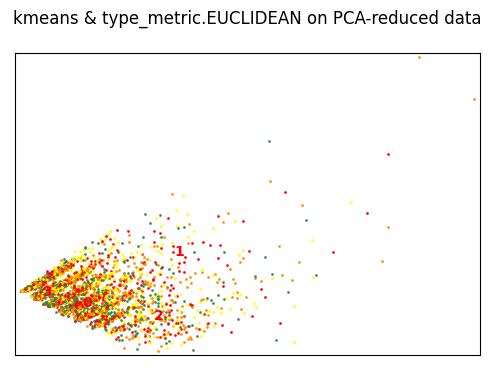

In [46]:
# 图可视化
graph_vis(data2,labels2,n_clusters2,metric1)

## 采用Cosine距离

In [47]:
# 对数据集一进行kmeans++&cos距离聚类
from pyclustering.utils.metric import distance_metric, type_metric
def cosine(vector1, vector2):
    return 1-np.dot(vector1,vector2)/(np.linalg.norm(vector1)*(np.linalg.norm(vector2))) # 1-u.v/|u||v|
metric2 = distance_metric(type_metric.USER_DEFINED, func=cosine)

kmeans_cos2,label_kmeans_cos_pred2 = Kmeans(data2,n_clusters2,metric2)

print(label_kmeans_cos_pred2)

[0, 1, 3, 1, 0, 2, 1, 2, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 1, 1, 2, 1, 0, 1, 3, 1, 1, 0, 3, 1, 1, 0, 1, 3, 0, 0, 1, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 3, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 3, 1, 1, 0, 0, 3, 1, 0, 0, 0, 0, 3, 0, 0, 0, 3, 3, 3, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 2, 1, 3, 0, 2, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 3, 2, 2, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 3, 1, 3, 0, 0, 0, 0, 2, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 1, 3, 0, 0, 0, 0, 2, 2, 3, 0, 0, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 1, 0, 3, 3, 1, 0, 1, 2, 1, 1, 0, 0, 1, 0, 0, 0, 1, 3, 0, 0, 0, 1, 3, 0, 3, 0, 0, 0, 0, 3, 1, 3, 3, 3, 0, 1, 2, 3, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 3, 1, 0, 1, 0, 0, 0, 3, 1, 1, 0, 0, 0, 0, 0, 3, 2, 0, 1, 0, 0, 1, 1, 2, 1, 1, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 1, 0, 3, 1, 3, 0, 0, 0, 0, 

In [48]:
# 指标评测
evaluate_cluster(name="k-means && COSINE_distance2", data=data2, labels=labels2, pred_labels=label_kmeans_cos_pred2)

__________________________________________________________________________________________
init				silhouette	CHI	DBI
k-means && COSINE_distance2	0.089		86.340	7.149
__________________________________________________________________________________________


In [49]:
# 表评测
save_csv(name="k-means && COSINE_distance2",labels=labels2,pred_labels=label_kmeans_cos_pred2)

   Labels  Count     Ratio                               Predictions
0       0   1386  0.559163  [(0, 775), (1, 345), (2, 160), (3, 106)]
1       1   1400  0.494286  [(0, 692), (1, 398), (3, 163), (2, 147)]
2       2   1381  0.500362  [(0, 691), (1, 351), (2, 184), (3, 155)]
3       3   1334  0.574963  [(0, 767), (1, 349), (2, 111), (3, 107)]


(5501, 2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: UserWarning: Attempting to set identical left == right == -9.319784735385612 results in singular transformations; automatically expanding.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: UserWarning: Attempting to set identical bottom == top == -16.21982263309612 results in singular transformations; automatically expanding.


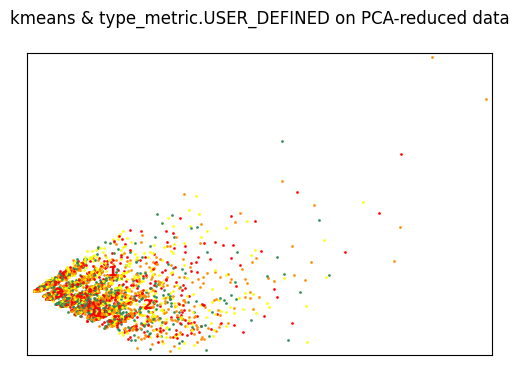

In [50]:
# 图可视化
graph_vis(data2,labels2,n_clusters2,metric2)

# 对数据集二进行Agglomerative聚类

## 采用canberra距离
分别采用complete、single、avg三种type-link

In [51]:
'''
pdist：计算样本距离,其中参数metric代表样本距离计算方法
(euclidean:欧式距离
minkowski:明氏距离
chebyshev:切比雪夫距离
canberra:堪培拉距离)
linkage：聚类,其中参数method代表簇间相似度计算方法
(single:  MIN
ward：沃德方差最小化
average：UPGMA
complete：MAX)
'''

label_agg_can_com_pred2 = Agglomerative(data2,n_clusters2,"canberra","complete")
# 指标评测
evaluate_cluster(name="canberra && complete link2", data=data2, labels=labels2, pred_labels=label_agg_can_com_pred2)
# 表评测
save_csv(name="agglomerative && canberra && complete link2",labels=labels2,pred_labels=label_agg_can_com_pred2)

__________________________________________________________________________________________
init				silhouette	CHI	DBI
canberra && complete link2	-0.290		37.444	6.469
__________________________________________________________________________________________
   Labels  Count     Ratio                             Predictions
0       0   1386  0.464646  [(3, 644), (1, 475), (0, 266), (2, 1)]
1       1   1400  0.462857          [(3, 648), (1, 562), (0, 190)]
2       2   1381  0.461260  [(1, 637), (3, 543), (0, 200), (2, 1)]
3       3   1334  0.464018          [(3, 619), (1, 473), (0, 242)]


In [52]:
label_agg_can_sin_pred2 = Agglomerative(data2,n_clusters2,"canberra","single")
# 指标评测
evaluate_cluster(name="canberra && single link2", data=data2, labels=labels2, pred_labels=label_agg_can_sin_pred2)
# 表评测
save_csv(name="agglomerative && canberra && single link2",labels=labels2,pred_labels=label_agg_can_sin_pred2)

__________________________________________________________________________________________
init				silhouette	CHI	DBI
canberra && single link2	0.695		24.055	0.181
__________________________________________________________________________________________
   Labels  Count     Ratio                  Predictions
0       0   1386  0.998557  [(0, 1384), (3, 1), (1, 1)]
1       1   1400  1.000000                  [(0, 1400)]
2       2   1381  0.999276          [(0, 1380), (2, 1)]
3       3   1334  1.000000                  [(0, 1334)]


In [53]:
label_agg_can_aver_pred2 = Agglomerative(data2,n_clusters2,"canberra","average")
# 指标评测
evaluate_cluster(name="canberra && average link2", data=data2, labels=labels2, pred_labels=label_agg_can_aver_pred2)
# 表评测
save_csv(name="agglomerative && canberra && average link2",labels=labels2,pred_labels=label_agg_can_aver_pred2)

__________________________________________________________________________________________
init				silhouette	CHI	DBI
canberra && average link2	-0.285		58.705	4.595
__________________________________________________________________________________________
   Labels  Count     Ratio                             Predictions
0       0   1386  0.853535  [(2, 1183), (0, 191), (1, 10), (3, 2)]
1       1   1400  0.822857   [(2, 1152), (0, 242), (1, 3), (3, 3)]
2       2   1381  0.765387           [(2, 1057), (0, 317), (1, 7)]
3       3   1334  0.847826   [(2, 1131), (0, 195), (1, 7), (3, 1)]


## 采用euclidean距离
分别采用complete、single、avg三种type-link

In [54]:
label_agg_eu_com_pred2 = Agglomerative(data2,n_clusters2,"euclidean","complete")
# 指标评测
evaluate_cluster(name="euclidean && complete link2", data=data2, labels=labels2, pred_labels=label_agg_eu_com_pred2)
# 表评测
save_csv(name="agglomerative && euclidean && complete link2",labels=labels2,pred_labels=label_agg_eu_com_pred2)


__________________________________________________________________________________________
init				silhouette	CHI	DBI
euclidean && complete link2	0.769		35.963	0.142
__________________________________________________________________________________________
   Labels  Count     Ratio                  Predictions
0       0   1386  0.999278          [(0, 1385), (1, 1)]
1       1   1400  0.998571  [(0, 1398), (3, 1), (2, 1)]
2       2   1381  1.000000                  [(0, 1381)]
3       3   1334  1.000000                  [(0, 1334)]


In [55]:
label_agg_eu_sin_pre2 = Agglomerative(data2,n_clusters2,"euclidean","single")
# 指标评测
evaluate_cluster(name="euclidean && single link", data=data2, labels=labels2, pred_labels=label_agg_eu_sin_pre2)
# 表评测
save_csv(name="agglomerative && euclidean && single link",labels=labels2,pred_labels=label_agg_eu_sin_pre2)

__________________________________________________________________________________________
init				silhouette	CHI	DBI
euclidean && single link	0.784		37.344	0.137
__________________________________________________________________________________________
   Labels  Count     Ratio                  Predictions
0       0   1386  0.999278          [(0, 1385), (1, 1)]
1       1   1400  0.998571  [(0, 1398), (3, 1), (2, 1)]
2       2   1381  1.000000                  [(0, 1381)]
3       3   1334  1.000000                  [(0, 1334)]


In [56]:
label_agg_eu_aver_pred2 = Agglomerative(data2,n_clusters2,"euclidean","average")
# 指标评测
evaluate_cluster(name="euclidean && average link2", data=data2, labels=labels2, pred_labels=label_agg_eu_aver_pred2)
# 表评测
save_csv(name="agglomerative && euclidean && average link2",labels=labels2,pred_labels=label_agg_eu_aver_pred2)

__________________________________________________________________________________________
init				silhouette	CHI	DBI
euclidean && average link2	0.784		37.344	0.137
__________________________________________________________________________________________
   Labels  Count     Ratio                  Predictions
0       0   1386  0.999278          [(0, 1385), (1, 1)]
1       1   1400  0.998571  [(0, 1398), (3, 1), (2, 1)]
2       2   1381  1.000000                  [(0, 1381)]
3       3   1334  1.000000                  [(0, 1334)]


## 采用chebyshev距离
分别采用complete、single、avg三种type-link

In [57]:
label_agg_ch_com_pred2 = Agglomerative(data2,n_clusters2,"chebyshev","complete")
# 指标评测
evaluate_cluster(name="chebyshev && complete link2", data=data2, labels=labels2, pred_labels=label_agg_ch_com_pred2)
# 表评测
save_csv(name="agglomerative && chebyshev && complete link2",labels=labels2,pred_labels=label_agg_ch_com_pred2)


__________________________________________________________________________________________
init				silhouette	CHI	DBI
chebyshev && complete link2	0.784		37.344	0.137
__________________________________________________________________________________________
   Labels  Count     Ratio                  Predictions
0       0   1386  0.999278          [(0, 1385), (1, 1)]
1       1   1400  0.998571  [(0, 1398), (3, 1), (2, 1)]
2       2   1381  1.000000                  [(0, 1381)]
3       3   1334  1.000000                  [(0, 1334)]


In [58]:
label_agg_ch_sin_pred2 = Agglomerative(data2,n_clusters2,"chebyshev","single")
# 指标评测
evaluate_cluster(name="chebyshev && single link2", data=data2, labels=labels2, pred_labels=label_agg_ch_sin_pred2)
# 表评测
save_csv(name="agglomerative && chebyshev && single link2",labels=labels2,pred_labels=label_agg_ch_sin_pred2)

__________________________________________________________________________________________
init				silhouette	CHI	DBI
chebyshev && single link2	0.784		37.344	0.137
__________________________________________________________________________________________
   Labels  Count     Ratio                  Predictions
0       0   1386  0.999278          [(0, 1385), (1, 1)]
1       1   1400  0.998571  [(0, 1398), (3, 1), (2, 1)]
2       2   1381  1.000000                  [(0, 1381)]
3       3   1334  1.000000                  [(0, 1334)]


In [59]:
label_agg_ch_aver_pred2 = Agglomerative(data2,n_clusters2,"chebyshev","average")
# 指标评测
evaluate_cluster(name="chebyshev && average link2", data=data2, labels=labels2, pred_labels=label_agg_ch_aver_pred2)
# 表评测
save_csv(name="agglomerative && chebyshev && average link2",labels=labels2,pred_labels=label_agg_ch_aver_pred2)

__________________________________________________________________________________________
init				silhouette	CHI	DBI
chebyshev && average link2	0.784		37.344	0.137
__________________________________________________________________________________________
   Labels  Count     Ratio                  Predictions
0       0   1386  0.999278          [(0, 1385), (2, 1)]
1       1   1400  0.998571  [(0, 1398), (3, 1), (1, 1)]
2       2   1381  1.000000                  [(0, 1381)]
3       3   1334  1.000000                  [(0, 1334)]


# 对数据集二进行SpectralBiclustering聚类

In [60]:
label_spe2=Spectral(data2,n_clusters2)

# 指标评测
evaluate_cluster(name="SpectralBiclustering2", data=data2, labels=labels2, pred_labels=label_spe2)
# 表评测
save_csv(name="SpectralBiclustering2",labels=labels2,pred_labels=label_spe2)

__________________________________________________________________________________________
init				silhouette	CHI	DBI
SpectralBiclustering2	0.067		107.638	5.992
__________________________________________________________________________________________
   Labels  Count     Ratio                              Predictions
0       0   1386  0.572150   [(0, 793), (2, 457), (1, 85), (3, 51)]
1       1   1400  0.519286  [(0, 727), (2, 488), (1, 126), (3, 59)]
2       2   1381  0.545981  [(0, 754), (2, 458), (1, 111), (3, 58)]
3       3   1334  0.590705   [(0, 788), (2, 430), (1, 83), (3, 33)]


# colab-vscode-ssh

In [64]:
# Install colab_ssh on google colab
!pip install colab_ssh --upgrade

ngrokToken="1scgO9VUex8aFnM46KXrQVdd3HU_3MeNAYp4XKLzeUjJnhsD6"
password="165115"

from colab_ssh import launch_ssh, init_git
launch_ssh(ngrokToken,password)

Requirement already up-to-date: colab_ssh in /usr/local/lib/python3.7/dist-packages (0.3.15)
we highly recommend that update your code by following this documentation https://github.com/WassimBenzarti/colab-ssh#getting-started
Successfully running 8.tcp.ngrok.io:18226
[Optional] You can also connect with VSCode SSH Remote extension using this configuration:

	Host google_colab_ssh
		HostName 8.tcp.ngrok.io
		User root
		Port 18226
	  


# case

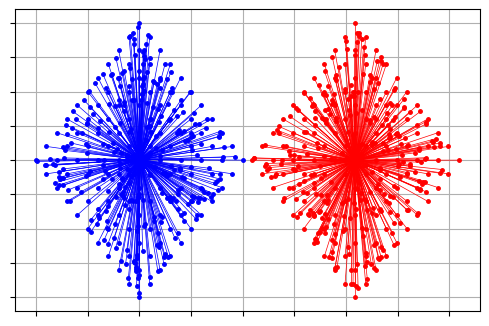

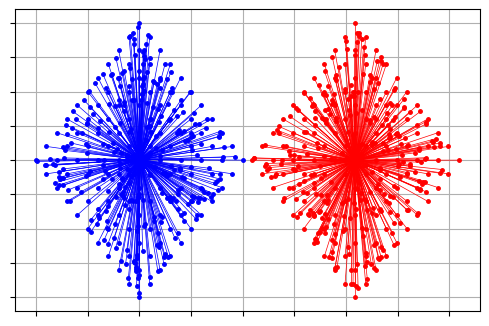

In [65]:
from pyclustering.cluster.kmeans import kmeans, kmeans_visualizer
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.samples.definitions import FCPS_SAMPLES
from pyclustering.utils import read_sample
import numpy as np

# Load list of points for cluster analysis.
sample = np.array(read_sample(FCPS_SAMPLES.SAMPLE_TWO_DIAMONDS))

# Prepare initial centers using K-Means++ method.
initial_centers = kmeans_plusplus_initializer(sample, 2).initialize()

# Create instance of K-Means algorithm with prepared centers.
kmeans_instance = kmeans(sample, np.array(initial_centers))

# Run cluster analysis and obtain results.
kmeans_instance.process()
clusters = kmeans_instance.get_clusters()
final_centers = kmeans_instance.get_centers()

# Visualize obtained results
kmeans_visualizer.show_clusters(sample, clusters, final_centers)

In [66]:
kmeans_instance.predict(np.array(sample))

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,